<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#model" data-toc-modified-id="model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>model</a></span><ul class="toc-item"><li><span><a href="#functions" data-toc-modified-id="functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>functions</a></span></li></ul></li><li><span><a href="#import-data" data-toc-modified-id="import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>import data</a></span><ul class="toc-item"><li><span><a href="#PCA-data-visualization" data-toc-modified-id="PCA-data-visualization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>PCA data visualization</a></span></li><li><span><a href="#transform-data-from-strings-to-numeric-data" data-toc-modified-id="transform-data-from-strings-to-numeric-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>transform data from strings to numeric data</a></span></li><li><span><a href="#prepare-data-for-model" data-toc-modified-id="prepare-data-for-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>prepare data for model</a></span></li></ul></li><li><span><a href="#nn-model1" data-toc-modified-id="nn-model1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>nn model1</a></span><ul class="toc-item"><li><span><a href="#nn_model-#2" data-toc-modified-id="nn_model-#2-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>nn_model #2</a></span></li><li><span><a href="#nn-model-3" data-toc-modified-id="nn-model-3-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>nn model 3</a></span></li></ul></li><li><span><a href="#nn-model-no-SMOTE,-use-weights" data-toc-modified-id="nn-model-no-SMOTE,-use-weights-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>nn model no SMOTE, use weights</a></span><ul class="toc-item"><li><span><a href="#model-and-assess-using-statistical-methods" data-toc-modified-id="model-and-assess-using-statistical-methods-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>model and assess using statistical methods</a></span></li></ul></li><li><span><a href="#use-best-performing-model-on-this-data" data-toc-modified-id="use-best-performing-model-on-this-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>use best performing model on this data</a></span></li><li><span><a href="#word2vec" data-toc-modified-id="word2vec-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>word2vec</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final Model</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [1]:
#import modules for Obtain/Scrub/Explore
import re
import pandas as pd 
import numpy as np 
import nltk
import string
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from collections import Counter

In [2]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# model

In [4]:
# import modules for model
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import random
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,  LabelBinarizer
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras import models, layers, optimizers, initializers, callbacks, regularizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Input, Activation, BatchNormalization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import gensim

## functions

In [5]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
#calculate metrics globally by counting the total tp, fn and fp
    precision_score(y_test, y_pred, average='micro')
    print("Micro-precision score")
    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    # precision = tp / (tp + fp)

In [6]:
def model_results(x):
    results_train = x.evaluate(X_train, y_train)
    print('Training:', results_train)
    results_val = x.evaluate(X_val, y_val)
    print('Validation:', results_val)
    results_test = x.evaluate(X_test, y_test)
    print('Test:', results_test)
    

In [7]:
def acc_loss_plot(model_dict):
    acc_values = model_dict['accuracy']
    loss_values =model_dict['loss']

    epochs = range(1, len(loss_values) + 1)

    # Plot the training loss vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, loss_values, 'b', label='Training loss')

    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    # Plot the training accuracy vs the number of epochs
    plt.figure(figsize=(12,9))
    plt.plot(epochs, acc_values, 'r', label='Training acc')


    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.show()

In [8]:
# assess metrics of model
def get_metrics(y_test, yhat_classes,yhat_probs):
# accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
    precision = precision_score(y_test, yhat_classes)
    print('Precision: %f' % precision)
# recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat_classes)
    print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat_classes)
    print('F1 score: %f' % f1)
# ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)
# confusion matrix
    matrix = confusion_matrix(y_test, yhat_classes)
    print(matrix)

In [9]:
def plot_history(x):
    pd.DataFrame(x.history).plot(figsize=(10, 8))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

In [10]:
#visualize confusion matrix
def vis_cm(model, X, y, y_pred):
    score = model.score(X, y)
    confusion = confusion_matrix(y, y_pred)
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    confusion.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
    matrix_title = "Test Accuracy: %0.2f for {model}" % (score)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# import data

In [11]:
df = pd.read_csv('pn_df.csv')

## PCA data visualization

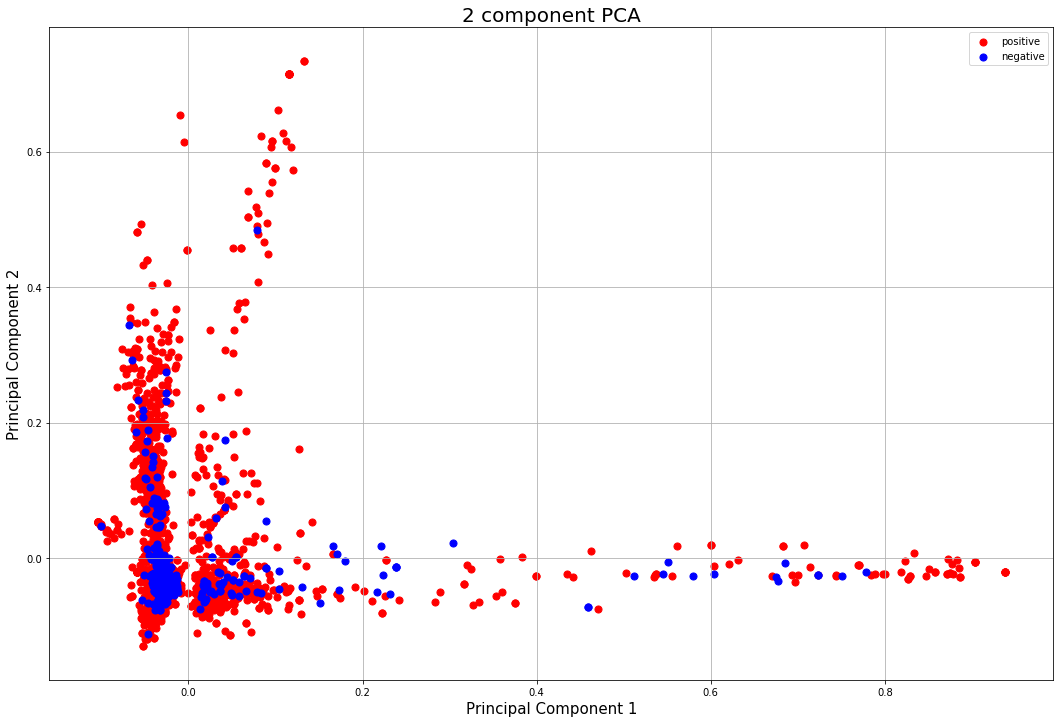

In [12]:
# plot PCA visualization of tokens

g_plot = df.copy()
col = ['wordl', 'sentiment']
g_plot = g_plot[col]
X_p = g_plot['wordl']
y_p = g_plot['sentiment']


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
Xp = pipeline.fit_transform(X_p).todense()

pca = PCA(n_components=2).fit(Xp)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Xp)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, g_plot[['sentiment']]], axis = 1)

fig = plt.figure(figsize = (18,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['positive', 'negative']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['sentiment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## transform data from strings to numeric data

## prepare data for model 

In [13]:
# convert target data with labelencoder
le = LabelEncoder()
y = df['target'].copy()
le.fit_transform(y)

array([0, 1, 1, ..., 0, 1, 1])

In [14]:
X = df.wordl.copy()

In [15]:
#X = [" ".join(t) for t in df.tokenl]
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                     test_size=.2, stratify=y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train,
                                                    test_size=0.1, 
                                                    random_state=42,
                                                    stratify=y_train)


In [16]:
# verify shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Validation label shape:', np.shape(y_val))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))
print('Validation shape:', np.shape(X_val))

Test label shape: (679,)
Train label shape: (2441,)
Validation label shape: (272,)
Test shape: (679,)
Train shape: (2441,)
Validation shape: (272,)


In [17]:
pipeline = Pipeline([ ('vect', CountVectorizer(ngram_range=(1,3))), 
                     ('tfidf', TfidfTransformer(use_idf=True)), ])
X_train = pipeline.fit_transform(X_train).todense() 
X_test = pipeline.transform(X_test).todense() 
X_val = pipeline.transform(X_val).todense()


In [18]:
# verify shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Validation label shape:', np.shape(y_val))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))
print('Validation shape:', np.shape(X_val))

Test label shape: (679,)
Train label shape: (2441,)
Validation label shape: (272,)
Test shape: (679, 29009)
Train shape: (2441, 29009)
Validation shape: (272, 29009)


In [19]:
counter = Counter(y_train)
print(counter)

Counter({1: 2051, 0: 390})


In [20]:
# apply smote to dataset due to imbalance of pos vs neg sentiment
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 2051, 0: 2051})


In [21]:
# verify new shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))

counter = Counter(y_train)
print(counter)

#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X_train)
count_terms = input_dimension[1]
print(count_terms)

Test label shape: (679,)
Train label shape: (4102,)
Test shape: (679, 29009)
Train shape: (4102, 29009)
Counter({1: 2051, 0: 2051})
29009


In [22]:
# parameters need to be defined, kernel initializers and regularizers applied. 
# assess layer structure, depth and width
# assess neurons 
# batch normalization
# dropout layers
# batch size and epochs
# activation function
# learning rate
# loss function & parameters

# nn model1 

In [23]:
# initializers with seed for reproducability
# for relu activated layer
initializer = keras.initializers.he_normal(seed=1)

# for tanh layer
initializer2 = keras.initializers.glorot_normal(seed=1)

# regularizer to minimize overfitting
regularizer = keras.regularizers.l2(0.01)

# early stopping callback to prevent overfitting
es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=6)

#define optimizer and learningrate/learning rate 
nad_opt = optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
ad_opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=10e-8)
sgd_opt = optimizers.SGD(lr=1e-6, momentum=0.9, nesterov=True)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
# create pyramid shaped sequential model

model1_2 = models.Sequential()

# activation layer 
model1_2.add(layers.Dense(500, input_dim=count_terms, activation='relu', 
                          kernel_regularizer=regularizer))
model1_2.add(layers.BatchNormalization(momentum=0.8))   
# add relu activated hidden layers
model1_2.add(layers.Dense(300, activation='relu'))   
# add relu activated hidden layers
model1_2.add(layers.Dense(100, activation='relu'))   
model1_2.add(layers.BatchNormalization(momentum=0.8))   
# add relu activated hidden layers
model1_2.add(layers.Dense(64,))   

model1_2.add(layers.Dense(6, ))  

# output layer with sigmoid activation for binary target
model1_2.add(layers.Dense(1, activation='sigmoid'))


nad_opt = optimizers.Nadam(lr=1e-5, beta_1=0.9, beta_2=0.999)
# use bce loss function for binary classification 
model1_2.compile(optimizer=nad_opt, loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# Train the model 
predictions1_2 = model1_2.fit(X_train,
                    y_train,
                    epochs=300,
                    callbacks=[es_callback],
                    batch_size=72,
                    validation_data=(X_val, y_val),
                    shuffle=True
                    )
                    


Train on 4102 samples, validate on 272 samples
Epoch 1/300
4102/4102 [==============================] - 40s 10ms/step - loss: 10.1502 - accuracy: 0.6404 - val_loss: 9.7188 - val_accuracy: 0.6912
Epoch 2/300
4102/4102 [==============================] - 33s 8ms/step - loss: 9.1895 - accuracy: 0.8827 - val_loss: 9.1225 - val_accuracy: 0.7904
Epoch 3/300
4102/4102 [==============================] - 41s 10ms/step - loss: 8.5643 - accuracy: 0.9676 - val_loss: 8.6199 - val_accuracy: 0.8199
Epoch 4/300
4102/4102 [==============================] - 35s 9ms/step - loss: 8.0641 - accuracy: 0.9902 - val_loss: 8.1926 - val_accuracy: 0.8199
Epoch 5/300
4102/4102 [==============================] - 38s 9ms/step - loss: 7.6308 - accuracy: 0.9956 - val_loss: 7.7775 - val_accuracy: 0.8382
Epoch 6/300
4102/4102 [==============================] - 35s 9ms/step - loss: 7.2356 - accuracy: 0.9988 - val_loss: 7.4118 - val_accuracy: 0.8382
Epoch 7/300
1008/4102 [======>.......................] - ETA: 37s - loss:

In [ ]:
model1_2.summary()

In [ ]:
m1_dict2 =  predictions1_2.history
m1_dict2.keys()

In [ ]:
plot_history(predictions1_2)

In [ ]:
acc_loss_plot(m1_dict2)

In [ ]:
model_results(model1_2)

In [ ]:
# predict probabilities for test set
yhat_probs = model1_2.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model1_2.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [ ]:
# assess metrics of model
get_metrics(y_test, yhat_classes, yhat_probs)

## nn_model #2 

In [ ]:
regularizer2 = keras.regularizers.l2(0.01)

In [ ]:
# create pyramid shaped sequential model
model2 = models.Sequential()
# activation layer 
model2.add(layers.Dense(300, input_dim=count_terms, activation='relu', 
                       kernel_initializer=initializer, kernel_regularizer=regularizer, ))
model2.add(layers.BatchNormalization(momentum=0.7))
# add relu activated hidden layers
model2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizer, 
                       ))   
# output layer with sigmoid activation for binary target
model2.add(layers.Dense(1, activation='sigmoid'))# create sequential model


In [ ]:
# Compile the model
# early stopping to prevent overfitting changed to training loss rather than val_loss
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5)

# optimizer
ad_opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# use bce loss function for binary classification 
model2.compile(optimizer=ad_opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model 
predictions3 = model2.fit(X_train,
                    y_train,
                    epochs=300,
                    callbacks=[es_callback],
                    batch_size=100,
                    validation_data=(X_val, y_val),
                    shuffle=True
                    )

In [ ]:
model2.summary()

In [ ]:
model2_dict = predictions3.history
model2_dict.keys()

In [ ]:
plot_history(predictions3)

In [ ]:
acc_loss_plot(model2_dict)

In [ ]:
# Print the loss and accuracy for the training set 
model_results(model2)

In [ ]:
# predict probabilities for test set
yhat_probs = model2.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model2.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]


In [ ]:
# assess metrics for model
get_metrics(y_test, yhat_classes, yhat_probs)

## nn model 3

In [ ]:
# create sequential model
model3 = models.Sequential()

# activation layer 
model3.add(layers.Dense(312, input_dim=count_terms, activation='relu',
                        kernel_regularizer=regularizer2))
model3.add(layers.BatchNormalization(momentum=0.8))
model3.add(layers.Dense(96,  activation='relu',))
model3.add(layers.Dense(32,  activation='relu',))
model3.add(layers.BatchNormalization(momentum=0.8))
model3.add(layers.Dense(10,  activation='relu',))
# output layer with sigmoid activation for binary target
model3.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5)
# optimizer
nad_opt = optimizers.Nadam(lr=1e-5, beta_1=0.9, beta_2=0.999)
# compile model
model3.compile(optimizer=nad_opt, loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
# Train the model 
predictions4 = model3.fit(X_train,
                    y_train,
                    epochs=256,
                    callbacks=[es_callback],
                    batch_size=72,
                    validation_data=(X_val, y_val),
                    shuffle=True
                         )

In [ ]:
model3_dict = predictions4.history
model3_dict.keys()

In [ ]:
model_results(model3)

In [ ]:
plot_history(predictions4)

In [ ]:
acc_loss_plot(model3_dict)

In [ ]:
# Output (probability) predictions for the train set 
y_hat_train = model3.predict(X_train) 


In [ ]:
# predict probabilities for test set
yhat_probs = model3.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model3.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [ ]:
get_metrics(y_test, yhat_classes,yhat_probs)

# nn model no SMOTE, use weights

In [ ]:
# prepare data
X = df.wordl.copy()

y1 = df['target'].astype('category')
# split data 
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y1, random_state=42,
                                                     test_size=.2, stratify=y1)

# split data 
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, random_state=42,
                                                     test_size=.1, stratify=y3_train)
# build TFIDF features on tweet with tfidf vectorizer
tfv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2), use_idf=True
                     )
X_train_trans = tfv.fit_transform(X3_train)
xdf = pd.DataFrame(X_train_trans[0].T.todense(),
index=tfv.get_feature_names(), columns=["term"])
xdf = xdf.sort_values('term', ascending=False)
print (xdf.head(25))
X_val_trans = tfv.transform(X3_val)
test_features = tfv.transform(X3_test)
X3_train = X_train_trans
X3_test = test_features
X3_val = X_val_trans

In [ ]:
# verify shape of data
print('Test label shape:', np.shape(y3_test))
print('Validation label shape:', np.shape(y3_val))
print('Train label shape:', np.shape(y3_train))
print('Test shape:', np.shape(X3_test))
print('Validation shape:', np.shape(X3_val))
print('Train shape:', np.shape(X3_train))
#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X3_train)
count_terms = input_dimension[1]


In [ ]:
# get class weights for use in model in lieu of smote
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y3_train), y3_train)
print(class_weights)

In [ ]:
# create model
model4 = models.Sequential()
# activation layer 
model4.add(layers.Dense(300, input_dim=count_terms, activation='relu', 
                       kernel_initializer=initializer, kernel_regularizer=regularizer, ))
model4.add(layers.BatchNormalization(momentum=0.7))
# add relu activated hidden layers
model4.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizer, 
                       ))   
# output layer with sigmoid activation for binary target
model4.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# early stopping callback to prevent overfitting
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta= 0.001, patience=5)
# use bce loss function for binary classification and default adagrad optimizerparameters
model4.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model 
predictions5 = model4.fit(X3_train,
                    y3_train,
                    epochs=200,
                    callbacks=[es_callback],
                    batch_size=72,
                    class_weight={1:3.1, 0:0.60},
                    validation_data=(X3_val, y3_val),
                    shuffle=True                    
                    )                 

In [ ]:
model4.summary()

In [ ]:
model4_dict = predictions5.history
model4_dict.keys()

In [ ]:
plot_history(predictions5)

In [ ]:
acc_loss_plot(model4_dict)

In [ ]:
# Print the loss and accuracy for the training set 
results_train = model4.evaluate(X3_train, y3_train)
results_train

In [ ]:
results_val = model4.evaluate(X3_val, y3_val)
results_val

In [ ]:
# Output (probability) predictions for the train set 
y_hat_train = model4.predict(X3_train) 

In [ ]:
# Print the loss and accuracy for the test set 
results_test = model4.evaluate(X3_test, y3_test)
results_test

In [ ]:
# predict probabilities for test set
yhat_probs = model4.predict(X3_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model4.predict_classes(X3_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [ ]:
get_metrics(y3_test, yhat_classes,yhat_probs)

In [ ]:
print(classification_report(y3_test, yhat_classes))

## model and assess using statistical methods

# use best performing model on this data 

In [ ]:
p6 = model1_2.fit(X3_train,
                    y3_train,
                    epochs=500,
                    callbacks=[es_callback],
                    batch_size=100,
                    class_weight={1:3.1, 0:0.60},
                    validation_data=(X3_val, y3_val),
                    shuffle=True
                         )


In [ ]:
# predict probabilities for test set
yhat_probs = model1_2.predict(X3_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model1_2.predict_classes(X3_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
get_metrics(y3_test, yhat_classes,yhat_probs)

In [ ]:
# summarize the  class distribution
counter = Counter(y_train)
print(counter)

# word2vec

In [ ]:
from tqdm import tqdm

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
maxlen=17

In [ ]:
from gensim.models import Word2Vec 
import time

start_time = time.time()

In [ ]:
lb = LabelBinarizer()
y = pd.DataFrame()
y = lb.fit_transform(df['target'])

In [ ]:
X= df['wordl'].copy()

In [ ]:
train_corpus = df['wordl'].copy()
size=100
## create list of lists of unigrams
corpus = []
for string in train_corpus:
   words = string.split()
   grams = [" ".join(words[i:i+1]) 
               for i in range(0, len(words), 1)]
   corpus.append(grams)

## detect bigrams 
bigrams_detector = gensim.models.phrases.Phrases(corpus, 
                delimiter=" ".encode(), min_count=5, threshold=7)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)


In [ ]:
wv_nlp_model_file = 'nlp_' + 'word2vec_' + str(size) + '.model'
wv_nlp_model = Word2Vec(corpus,  min_count=1,
                     window=5,
                     size=100,
                     sg=1,
                     workers=5)
print("Time taken to train word2vec nlp model: " + str(time.time() - start_time))
wv_nlp_model.save(wv_nlp_model_file)

In [ ]:

## tokenize text
tokenizer = Tokenizer(split=' ', 
                      )
tokenizer.fit_on_texts(corpus)
dic_vocabulary = tokenizer.word_index
## create sequence
text2seq= tokenizer.texts_to_sequences(corpus)
## padding sequence
X = pad_sequences(text2seq, 
                    maxlen=maxlen+1, padding="post", truncating="post")

In [ ]:
vocab_size = (len(dic_vocabulary)+1)
vocab_size

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     df['target'], 
                                                     random_state=42,
                                                     test_size=.2, stratify=y)

In [ ]:
sns.heatmap(X_train==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [ ]:
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = np.zeros((len(dic_vocabulary)+1, size))
for word,idx in dic_vocabulary.items():
    ## update the row with vector
    try:
        embeddings[idx] =  wv_nlp_model[word]
    ## if word not in model then skip and the row stays all 0s
    except:
        pass

In [ ]:
i = 0

## list of text: ["I like this", ...]
len_txt = len(df["wordl"].iloc[i].split())
print("from: ", df["wordl"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", df["wordl"].iloc[i].split()[0], 
      " -- idx in vocabulary -->", 
      dic_vocabulary[df["wordl"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

In [ ]:
# plot heatmap for test data
sns.heatmap(X_test==0, vmin=0, vmax=1, cbar=False)
plt.show()

In [ ]:
word = "app"
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, 
      "|vector")
print(embeddings.shape)
print(len(dic_vocabulary))

In [ ]:
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))

In [ ]:
regularizerA = keras.regularizers.l2(0.01)
regularizerB = keras.regularizers.l2(0.001)

In [ ]:

modelw = models.Sequential()

## embedding
modelw.add(layers.Embedding(vocab_size, 400, input_length=maxlen+1, ))
                       
modelw.add(layers.BatchNormalization(momentum=0.8))
     
modelw.add(layers.Dense(200, activation='relu', ))  
#modelw.add(layers.BatchNormalization(momentum=0.6))
modelw.add(layers.Dense(44, activation='relu',  )) 
modelw.add(layers.GlobalAveragePooling1D()),
modelw.add(layers.Dense(1, activation='sigmoid'))
a_opt = optimizers.Adam(lr=1e-5,)

## compile
modelw.compile(loss='binary_crossentropy',
              optimizer=a_opt, metrics=['accuracy'])

modelw.summary()

In [ ]:
# early stopping to prevent overfitting
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta= 0.001, patience=13)
#es_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)
#fit model
training = modelw.fit(X_train, y_train, 
                     epochs=500,
                     batch_size=72,
                     callbacks=[es_callback], 
                     validation_split=0.10,
                     shuffle=True
                     )

In [ ]:
modelw_dict = training.history
modelw_dict.keys()

In [ ]:
plot_history(training)
acc_loss_plot(modelw_dict)


In [ ]:
## encode y
dic_y_mapping = {n:label for n,label in 
                 enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
y_train = np.array([inverse_dic[y] for y in y_train])


metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:

    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
     ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [ ]:
results_train = modelw.evaluate(X_train, y_train)
print('Training:', results_train)

results_test = modelw.evaluate(X_test, y_test)
print('Test:', results_test)
    

In [ ]:
# predict probabilities for test set
yhat_probs = modelw.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = modelw.predict_classes(X_test, verbose=0)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
get_metrics(y_test, yhat_classes,yhat_probs)

In [ ]:
vocab = list(wv_nlp_model.wv.vocab)
Xwv = wv_nlp_model [wv_nlp_model.wv.vocab]
df_wv =pd.DataFrame(Xwv)

print(len(df_wv))

df_wv.head()

In [ ]:
from sklearn.decomposition import IncrementalPCA    
from sklearn.manifold import TSNE                    
import plotly


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=42)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True, ):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels,)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


In [ ]:
x_vals, y_vals, labels = reduce_dimensions(wv_nlp_model)
plot_with_plotly(x_vals, y_vals, labels)


# Final Model

In [ ]:
# get class weights for use in model in lieu of smote
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y3_train), y3_train)
print(class_weights)

In [ ]:
# define parameters for final model
initializer = keras.initializers.he_normal(seed=1)
regularizer = keras.regularizers.l2(0.01)
es_callback = keras.callbacks.EarlyStopping(monitor='loss', min_delta= 0.001, patience=7)
# create  sequential model
final_model = models.Sequential()
# activation layer 
final_model.add(layers.Dense(300, input_dim=count_terms, activation='relu', 
                       kernel_initializer=initializer, kernel_regularizer=regularizer, ))
final_model.add(layers.BatchNormalization(momentum=0.7))
# add relu activated hidden layers
final_model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizer, 
                       ))   
# output layer with sigmoid activation for binary target
final_model.add(layers.Dense(1, activation='sigmoid'))

# compile
final_model.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model 
final_predictions = final_model.fit(X3_train,
                    y3_train,
                    epochs=200,
                    callbacks=[es_callback],
                    batch_size=72,
                    class_weight={1:3.1, 0:0.60},
                    validation_data=(X3_val, y3_val),
                    shuffle=True,
                            
                    )                 

In [ ]:
final_dict = final_predictions.history
results_train = final_model.evaluate(X3_train, y3_train)
y_hat_train = final_model.predict(X3_train) 
results_val = final_model.evaluate(X3_val, y3_val) 
results_test = final_model.evaluate(X3_test, y3_test)
yhat_probs = final_model.predict(X3_test, verbose=0)
yhat_classes = final_model.predict_classes(X3_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
print('Train results', results_train)
print('Validation results', results_val)
print('Test results', results_test)

In [ ]:
get_metrics(y3_test, yhat_classes,yhat_probs)

In [ ]:
#save model
final_model.save("final_model.h5") 
print("model saved!!!")

# Conclusion

models are all overfitting in some capacity. attempted making neural network smaller, applied bias, kernel initializers, l1 and l2 regularizers, batch normalization layers, and dropout layers to minimize loss providing slightly better results but still overfitting occurs to provide accuracy over 80%. this is due to unbalanced and small dataset. this occurs on smote balanced data as well as data ran with weights provided. More data should be obtained to improve results. further assessment planned on retweets and hashtags relativity to sentiment.

due to the fact that i got pretty similar accuracy results(80-87 percent) on the best models using various methods, i think the best way to improve this is to get additional data.